In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [490]:
data = pd.read_csv("loan_prediction.csv")

In [491]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [492]:
data.shape

(614, 13)

In [493]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

There are 614 rows and 13 columns of features.

In [494]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we get the info of the entire data set we will now examine the traget variable.

In [496]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [497]:
#percentage distribution can be calculated by setting the noramlize=True to show proportions instead of number
data["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

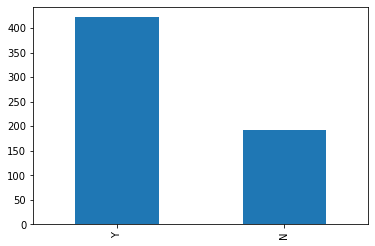

In [498]:
data["Loan_Status"].value_counts().plot.bar()

From the above plot we can see that the loan of 422 people out of 614 was approved. Its around 69% of the data that means there is no class imbalance
issue in the dataset, thus accuracy as an evalution metric should be appropriate. On the other hand, if there is imbalance or skewes classes, then we might need to use 
precision nd recall as evaluation metrics.

There are 5 features that are categorical ie.["Gender","Married","Self_Employed","Credit_History","Education"].

<AxesSubplot:title={'center':'Education'}>

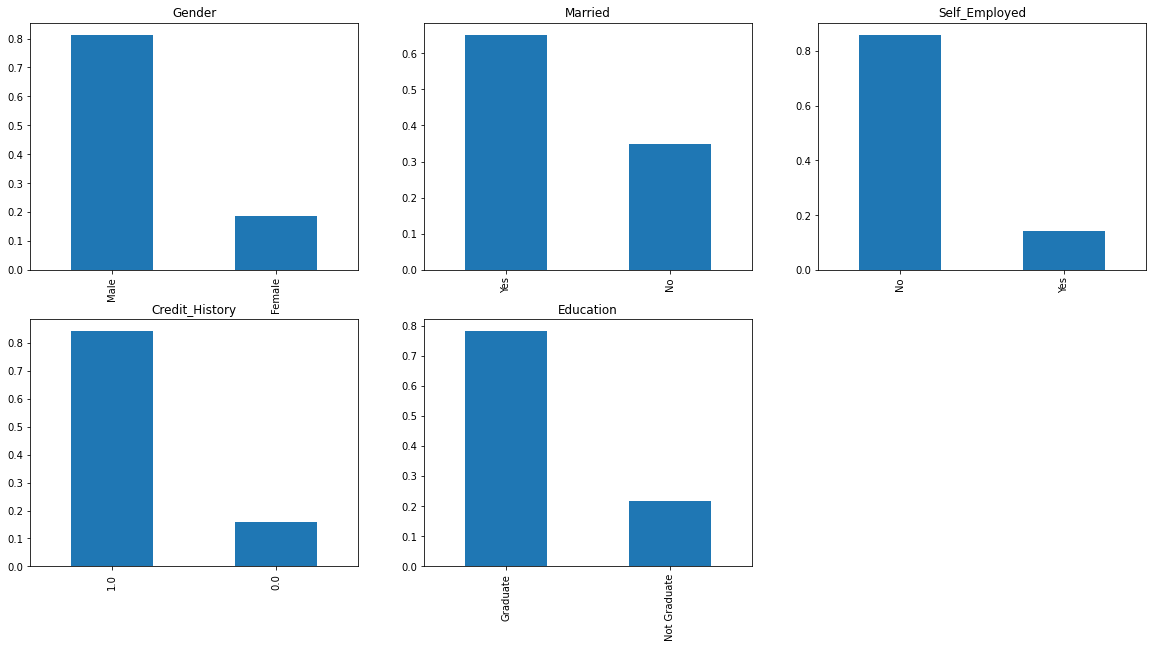

In [499]:
#visualizing categorical features
plt.subplot(231)
data["Gender"].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Gender" )

plt.subplot(232)
data["Married"].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Married")

plt.subplot(233)
data["Self_Employed"].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Self_Employed")

plt.subplot(234)
data["Credit_History"].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Credit_History")

plt.subplot(235)
data["Education"].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Education")

From the above graph we observed that:-
1.80% of loan applicants are male.
2.Around 65% of the applicants are married.
3.Around 15% applicants are self employed.
4.Around 85% applicants havr credit history.
5.Around 80% of the applicants are graduate.

Now there are 2 features that are orinal variables in categorical features having some order involved ie. ["Dependents","Property_Area"]

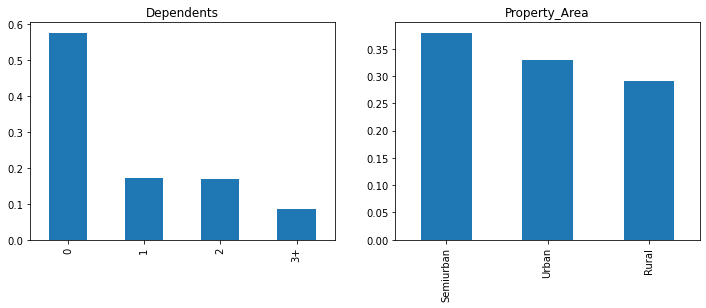

In [500]:
plt.subplot(121)
data["Dependents"].value_counts(normalize = True).plot.bar(figsize = (12,4) ,title="Dependents")

plt.subplot(122)
data["Property_Area"].value_counts(normalize = True).plot.bar(title="Property_Area")

plt.show()

From the above graphs we can see that :- 1.More tha half of the applicants do not have any dependents. 2.Most of the applicants are in Semiurban area.

Now there are 4 features that are numerical i.e ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term "]

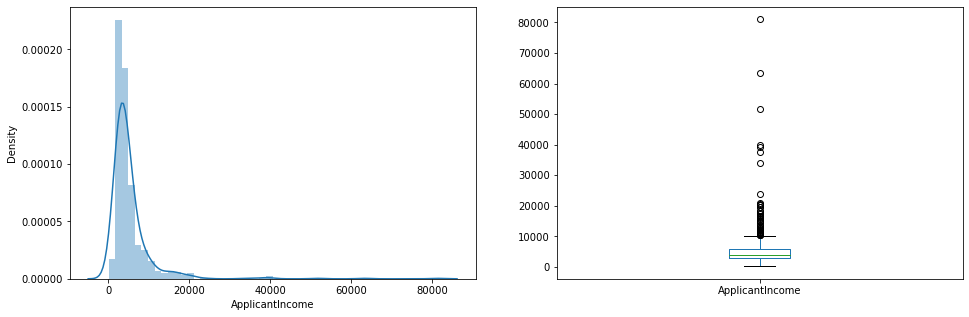

In [501]:
plt.subplot(121)
sns.distplot(data["ApplicantIncome"])

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize = (16,5))

plt.show()

As we can see the distribution of the data is towards left which is not normally distributed so we will try to normally distributed for best predictions.

Text(0.5, 0.98, '')

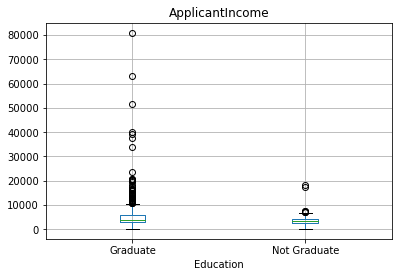

In [502]:
data.boxplot(column = "ApplicantIncome" , by = "Education")
plt.suptitle("")

Above we can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

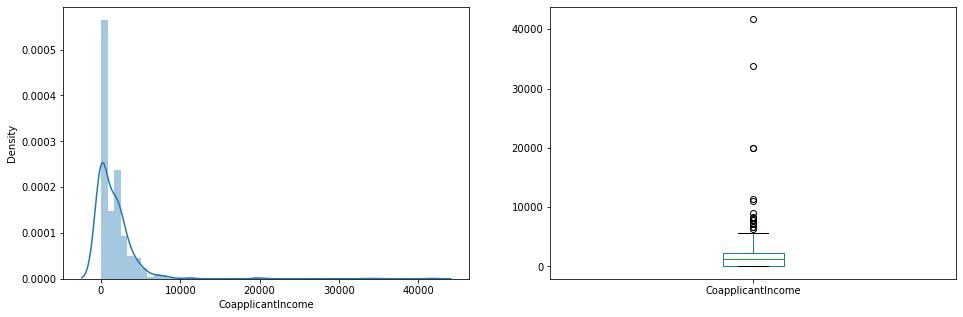

In [503]:
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])

plt.subplot(122)
data["CoapplicantIncome"].plot.box(figsize = (16,5))

plt.show()

From above we can see the distribution is similar that of applicant income. Majority of coapplicant's income ranges 0 to 5000.

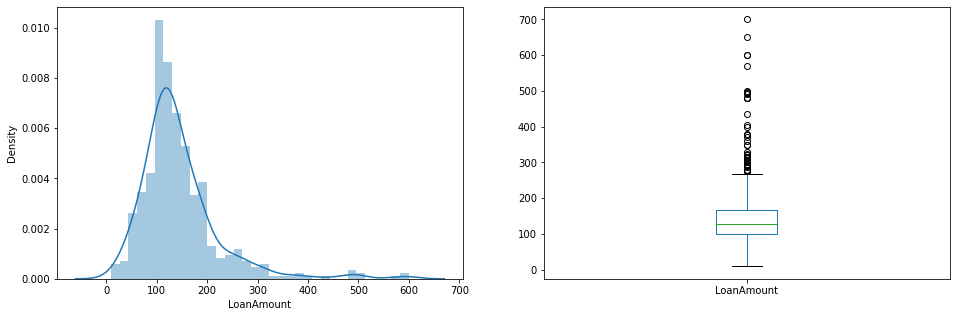

In [504]:
plt.subplot(121)
df = data.dropna()
sns.distplot(df["LoanAmount"])

plt.subplot(122)
data["LoanAmount"].plot.box(figsize = (16,5))

plt.show()

In [ ]:
From above graph it is seen that the loam amount is fairly distributed but there are alot of outliers.

In [505]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:title={'center':'Loan_Amount_Term'}>

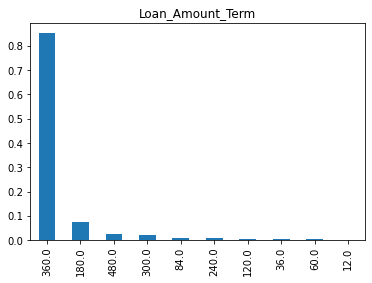

In [506]:
data["Loan_Amount_Term"].value_counts(normalize = True).plot.bar(title = "Loan_Amount_Term")

Around 85% of the loans are 360 months term or 30 years periods.

Now we will plot the graphs to find the relationship between the traget variable and categorical independent variable.

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


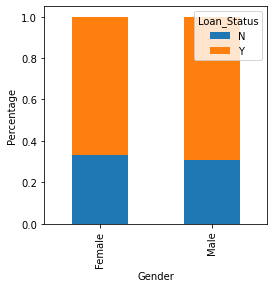

In [507]:
print(pd.crosstab(data["Gender"],data["Loan_Status"]))

Gender = pd.crosstab(data["Gender"],data["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Gender")
p = plt.ylabel("Percentage")

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


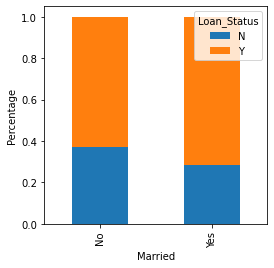

In [508]:
print(pd.crosstab(data["Married"],data["Loan_Status"]))

Married = pd.crosstab(data["Married"],data["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Married")
p = plt.ylabel("Percentage")

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


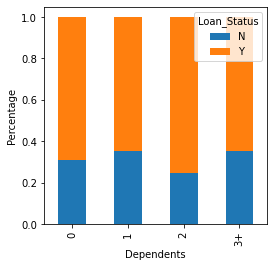

In [509]:
print(pd.crosstab(data["Dependents"],data["Loan_Status"]))

Dependents = pd.crosstab(data["Dependents"],data["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Dependents")
p = plt.ylabel("Percentage")

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


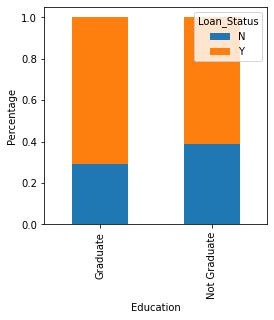

In [510]:
print(pd.crosstab(data["Education"],data["Loan_Status"]))

Education = pd.crosstab(data["Education"],data["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Education")
p = plt.ylabel("Percentage")

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


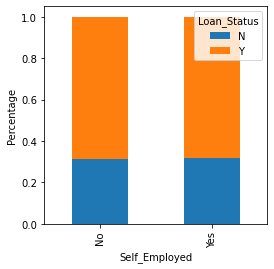

In [511]:
print(pd.crosstab(data["Self_Employed"],data["Loan_Status"]))

Self_Employed = pd.crosstab(data["Self_Employed"],data["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Self_Employed")
p = plt.ylabel("Percentage")

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


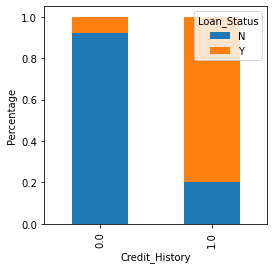

In [512]:
print(pd.crosstab(data["Credit_History"],data["Loan_Status"]))

Credit_History = pd.crosstab(data["Credit_History"],data["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Credit_History")
p = plt.ylabel("Percentage")

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


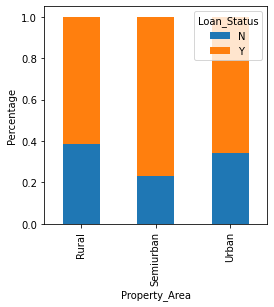

In [513]:
print(pd.crosstab(data["Property_Area"],data["Loan_Status"]))

Property_Area = pd.crosstab(data["Property_Area"],data["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Property_Area")
p = plt.ylabel("Percentage")

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

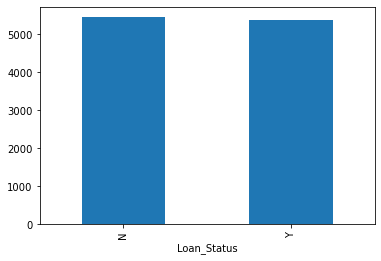

In [514]:
print(data.groupby("Loan_Status")["ApplicantIncome"].mean())

data.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

In [515]:
bins = [0,2500,4000,6000,81000]
group = ["Low","Average","High","Very High"]
data["Income_bin"] = pd.cut(df["ApplicantIncome"],bins,labels = group)

In [516]:
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,High
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very High


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very High    39   73


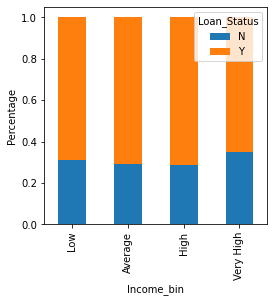

In [517]:
print(pd.crosstab(data["Income_bin"],data["Loan_Status"]))

Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Income_bin")
p = plt.ylabel("Percentage")

In [518]:
bins = [0,1000,3000,42000]
group = ["Low","Average","Very High"]
data["Coapplicant_Income_bin"] = pd.cut(df["CoapplicantIncome"],bins,labels = group)

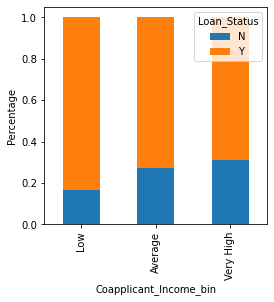

In [519]:
Coapplicant_Income_bin = pd.crosstab(data["Coapplicant_Income_bin"],data["Loan_Status"])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Coapplicant_Income_bin")
p = plt.ylabel("Percentage")

In [520]:
print(len(data[data["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is :", len(data[data["CoapplicantIncome"] == 0])/len(data["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is :', 0.44462540716612375)

In [521]:
data["Total_Income"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [522]:
bins = [0,2500,4000,6000,81000]
group = ["Low","Average","High","Very High"]
data["Total_Income_bin"] = pd.cut(data["Total_Income"],bins,labels=group)

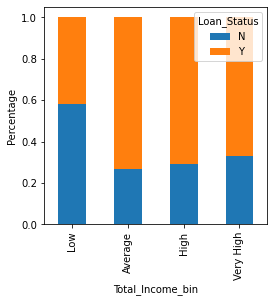

In [523]:
Total_Income_bin = pd.crosstab(data["Total_Income_bin"],data["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("Total_Income_bin")
p = plt.ylabel("Percentage")

In [524]:
bins = [0,100,200,700]
group = ["Low","Average","High"]
data["LoanAmount_bin"] = pd.cut(data["LoanAmount"],bins,labels = group)

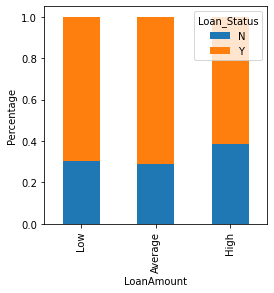

In [525]:
LoanAmount_bin = pd.crosstab(data["LoanAmount_bin"],data["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize=(4,4))
plt.xlabel("LoanAmount")
p = plt.ylabel("Percentage")

In [526]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [ ]:
Now as we can see there are some columns which is of no use then we should have to drop them.

In [527]:
data = data.drop(["Income_bin","Coapplicant_Income_bin", "LoanAmount_bin","Total_Income_bin","Total_Income"], axis = 1)

In [528]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [529]:
data["Dependents"].replace("3+", 3, inplace=True)

In [530]:
data["Loan_Status"].replace("N", 0, inplace = True)
data["Loan_Status"].replace("Y", 1, inplace = True)

In [531]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [ ]:
Now we will find the correlation between the features and the target variables.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


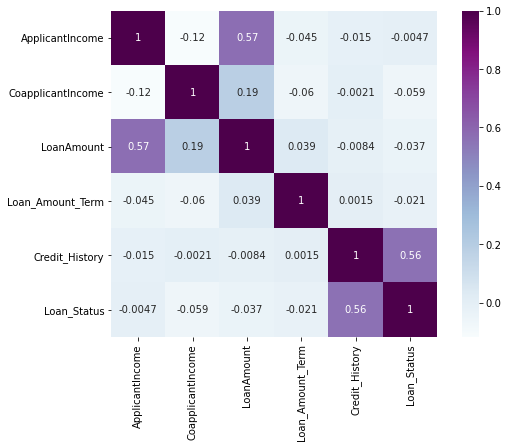

In [532]:
corr = data.corr()

f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(corr, vmax = 1, square = True, cmap = "BuPu", annot=True)

corr

In [533]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
As we know that our data contains missing value we will fill it with the mode.

In [534]:
data["Gender"].fillna(data["Gender"].mode()[0], inplace = True)
data["Married"].fillna(data["Married"].mode()[0], inplace = True)
data["Dependents"].fillna(data["Dependents"].mode()[0], inplace = True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0], inplace = True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0], inplace = True)

In [535]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [536]:
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0], inplace = True)

In [537]:
data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace = True)

In [538]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0.5, 1.0, 'Data')

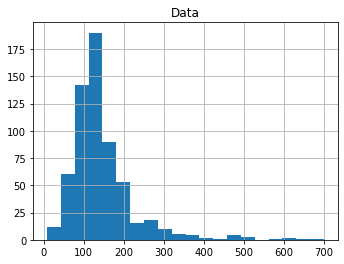

In [539]:
ax1 = plt.subplot(121)
data["LoanAmount"].hist(bins = 20, figsize = (12,4))
ax1.set_title("Data")

In [540]:
data["LoanAmount_log"] = np.log(data["LoanAmount"])

Text(0.5, 1.0, 'Data')

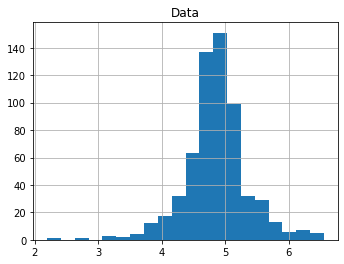

In [541]:
ax1 = plt.subplot(121)
data["LoanAmount_log"].hist(bins = 20, figsize=(12,4))
ax1.set_title("Data")

In [542]:
data = data.drop("Loan_ID",axis = 1)

In [543]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [544]:
x = data.drop("Loan_Status",axis = 1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [548]:
data = data.drop(["Gender","Dependents","Self_Employed"],axis = 1)
data.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [549]:
y = data["Loan_Status"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
Now we will scale the data fro the appropriate and better prediction.

In [550]:
x = pd.get_dummies(x)
data = pd.get_dummies(data)

In [551]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


Now as we done scaling the data we will now divide into train and test to applyand get the best model.

In [552]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75,random_state = 0)

In [553]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((460, 21), (154, 21), (460,), (154,))

In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [555]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [557]:
pred_lr = lr.predict(x_test)

In [558]:
accuracy_score(y_test, pred_lr)

0.8311688311688312

[[ 20  23]
 [  3 108]]


Text(33.0, 0.5, 'True')

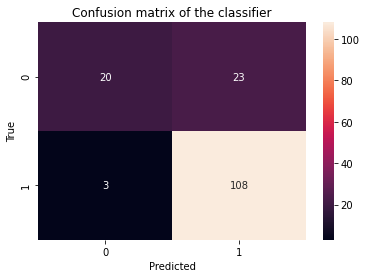

In [561]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred_lr)
print(cm)

sns.heatmap(cm, annot = True, fmt = "d")
plt.title("Confusion matrix of the classifier")
plt.xlabel("Predicted")
plt.ylabel("True")

In [562]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.82      0.97      0.89       111

    accuracy                           0.83       154
   macro avg       0.85      0.72      0.75       154
weighted avg       0.84      0.83      0.81       154



In [567]:
from sklearn.model_selection import StratifiedKFold

In [570]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)

for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))

# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold
accuracy_score 0.8048780487804879

2 of kfold
accuracy_score 0.8373983739837398

3 of kfold
accuracy_score 0.7804878048780488

4 of kfold
accuracy_score 0.7886178861788617

5 of kfold
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8012928162068507


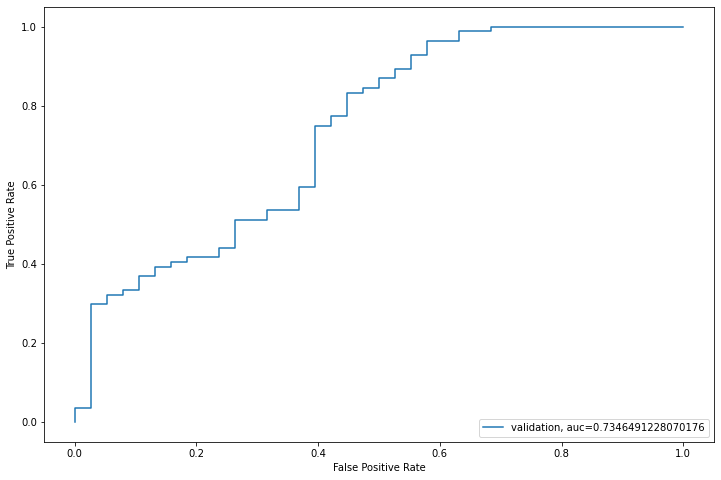

In [571]:
 from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [572]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

Text(0.5, 1.0, 'Data')

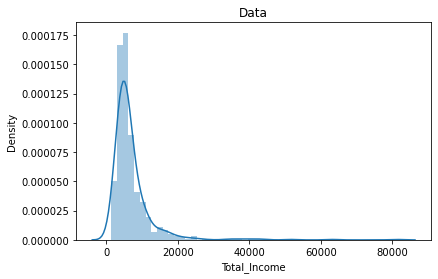

In [574]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(data['Total_Income'])
 
ax1.set_title("Data")

In [575]:
data['Total_Income_log'] = np.log(data['Total_Income'])

Text(0.5, 1.0, 'Data')

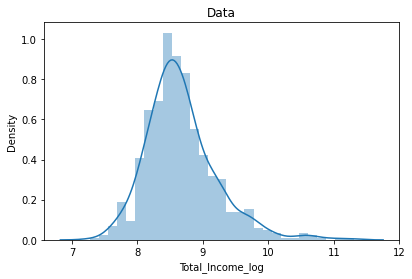

In [576]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(data['Total_Income_log'])
ax1.set_title("Data")

In [577]:
data['EMI'] = data['LoanAmount'] / data['Loan_Amount_Term']

Text(0.5, 1.0, 'Data')

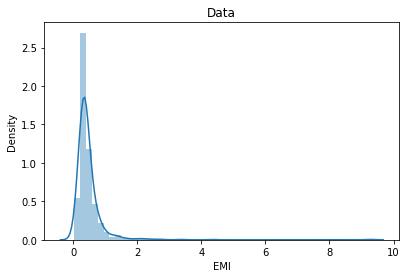

In [578]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(data['EMI'])
ax1.set_title("Data")

In [579]:
data['Balance Income'] = data['Total_Income'] - (data['EMI']*1000)

Text(0.5, 1.0, 'Data')

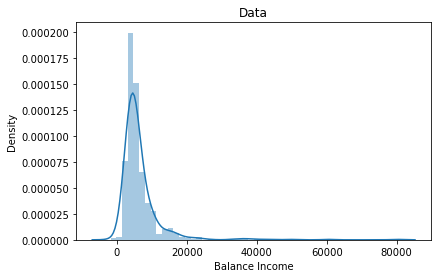

In [580]:
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(data['Balance Income'])
ax1.set_title("Data")

In [581]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,1,0,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,1,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [582]:
data = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [584]:
data.head()

,Credit_History,Loan_Status,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,1,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,0,1,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,0,1,1,0,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,0,1,0,1,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,1,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [586]:
from sklearn import tree

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.6991869918699187

2 of kfold 5
accuracy_score 0.7398373983739838

3 of kfold 5
accuracy_score 0.7154471544715447

4 of kfold 5
accuracy_score 0.7235772357723578

5 of kfold 5
accuracy_score 0.6721311475409836

Mean validation accuracy:  0.7100359856057576


In [587]:
from sklearn.ensemble import RandomForestClassifier

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7049180327868853

Mean validation accuracy:  0.7767559642809543


From above we can see that our best model is RandomForest with the accuracy of 785 so now we will find the best params of it.

In [588]:
from sklearn.model_selection import GridSearchCV

paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=1)

In [589]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [590]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

In [592]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=7, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.8094095695055312


After finding the best params we have seen that the accuracy got up about 80%.

<AxesSubplot:>

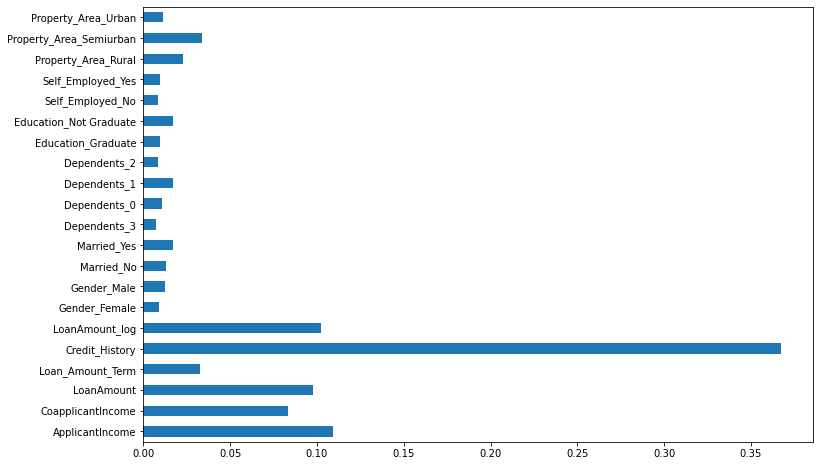

In [594]:
importances = pd.Series(model.feature_importances_, index=x.columns)

importances.plot(kind='barh', figsize=(12,8))

Saving model:-

In [595]:
import joblib
joblib.dump(model,"LoanApproval")

['LoanApproval']